# ____ Analysis

## Your research question:
[Complete this based on your chosen data set]



In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

kpop_data = pd.read_csv("Marvel_Movies.csv") # Talk with Mr. Moden about how to get access to your data


## Part 1: Get a sense of the data
Before you start doing anything with you data, you need to get a sense of what the data contains. Considering using .info(), .describe(), .columns, or other tools to get a sense of the data. You can reference ChatGPT if you are looking for other options.

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

marvel_data = pd.read_csv("Marvel_Movies.csv") # Talk with Mr. Moden about how to get access to your data
marvel_data.info()
marvel_data.describe()
marvel_data.columns
marvel_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16376 non-null  object 
 1   ID                12606 non-null  object 
 2   ALIGN             13564 non-null  object 
 3   EYE               6609 non-null   object 
 4   HAIR              12112 non-null  object 
 5   SEX               15522 non-null  object 
 6   GSM               90 non-null     object 
 7   ALIVE             16373 non-null  object 
 8   APPEARANCES       15280 non-null  float64
 9   FIRST APPEARANCE  15561 non-null  object 
 10  Year              15561 non-null  float64
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


,name,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,Spider-Man (Peter Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [51]:
marvel_data["ALIVE"].value_counts()
marvel_data["SEX"].value_counts()
marvel_data["ALIGN"].value_counts()
marvel_data["EYE"].value_counts()

Blue Eyes          1962
Brown Eyes         1924
Green Eyes          613
Black Eyes          555
Red Eyes            508
White Eyes          400
Yellow Eyes         256
Grey Eyes            95
Hazel Eyes           76
Variable Eyes        49
Purple Eyes          31
Orange Eyes          25
Pink Eyes            21
One Eye              21
Gold Eyes            14
Silver Eyes          12
Violet Eyes          11
Amber Eyes           10
Multiple Eyes         7
No Eyes               7
Yellow Eyeballs       6
Black Eyeballs        3
Magenta Eyes          2
Compound Eyes         1
Name: EYE, dtype: int64

Explanation:
I used the following methods to get an idea of what the data contains.
marvel_data.info()
marvel_data.describe()
marvel_data.columns
marvel_data.head()


I found that there are 11 columns, 2 numerical columns and 9 object columns, with 16376 pieces of data. Almost all of the columns have data missing, some with just a few nulls and some with around 15000 nulls. 

### Write your response in this space.

## Part 2: Data Cleaning
Look for missing data. If you decide to drop rows or columns, explain your choice.

In [45]:
marvel_data["ALIVE"]

0        Living Characters
1        Living Characters
2        Living Characters
3        Living Characters
4        Living Characters
               ...        
16371    Living Characters
16372    Living Characters
16373    Living Characters
16374    Living Characters
16375    Living Characters
Name: ALIVE, Length: 16376, dtype: object

In [46]:
#Write your code here
import numpy as np
marvel_data.dropna(how="all", inplace=True)
# marvel_data.replace("Living Characters", 1)
print(marvel_data['ALIVE'])
alive_vs_dead = {'Living Characters': 1, "Deceased Characters": 0, np.nan: -1}

# Use the map function to replace values
marvel_data['ALIVE'] = marvel_data['ALIVE'].map(alive_vs_dead)
marvel_data['ALIVE'].unique()


gender = {"Male Characters": 1, "Female Characters": 2, "Agender Characters": 3, "Genderfluid Characters": 4, np.nan: -1}
marvel_data['SEX'] = marvel_data['SEX'].map(gender)

alignment = {"Bad Characters":-1, "Good Characters": 1, "Neutral Characters": 0, np.nan: -1}
marvel_data['ALIGN'] = marvel_data['ALIGN'].map(alignment)

0        Living Characters
1        Living Characters
2        Living Characters
3        Living Characters
4        Living Characters
               ...        
16371    Living Characters
16372    Living Characters
16373    Living Characters
16374    Living Characters
16375    Living Characters
Name: ALIVE, Length: 16376, dtype: object


Did you drop columns or rows? If so, explain why. If not, explain why not.

I only dropped rows that have no data because it wouldnt be useful for me but i wanted to keep columns even if they didnt have a lot of data so that i could see the comparison between dates and characters. I also changed the ALIVE column to be numerical so that i could use it in my comparison graphing.

### Write your response in this space.

## Part 3: Data manipulation
Use groupby to analyze data and get a better understanding of potential trends. For example, if you want to look at scoring likelihood, you might group teams by whether they were home or away or you could group them by team. You should be using groupby on categorical data, not on numerical data (ask me why if you aren't sure).

In [52]:
#Write your code here
groups = marvel_data.groupby("EYE")
groups

In [53]:
for key, group in groups:
    print(key, len(group))

Amber Eyes 10
Black Eyeballs 3
Black Eyes 555
Blue Eyes 1962
Brown Eyes 1924
Compound Eyes 1
Gold Eyes 14
Green Eyes 613
Grey Eyes 95
Hazel Eyes 76
Magenta Eyes 2
Multiple Eyes 7
No Eyes 7
One Eye 21
Orange Eyes 25
Pink Eyes 21
Purple Eyes 31
Red Eyes 508
Silver Eyes 12
Variable Eyes 49
Violet Eyes 11
White Eyes 400
Yellow Eyeballs 6
Yellow Eyes 256


In [54]:
groups["ALIGN"].mean()

EYE
Amber Eyes        -0.500000
Black Eyeballs     0.666667
Black Eyes        -0.261261
Blue Eyes          0.035678
Brown Eyes        -0.043139
Compound Eyes     -1.000000
Gold Eyes          0.000000
Green Eyes        -0.223491
Grey Eyes         -0.221053
Hazel Eyes        -0.131579
Magenta Eyes       0.000000
Multiple Eyes     -0.142857
No Eyes           -0.714286
One Eye           -0.428571
Orange Eyes       -0.440000
Pink Eyes          0.000000
Purple Eyes       -0.451613
Red Eyes          -0.608268
Silver Eyes       -0.250000
Variable Eyes     -0.489796
Violet Eyes       -0.090909
White Eyes        -0.310000
Yellow Eyeballs   -0.333333
Yellow Eyes       -0.519531
Name: ALIGN, dtype: float64

In [55]:
groups["ALIGN"].std()

EYE
Amber Eyes         0.707107
Black Eyeballs     0.577350
Black Eyes         0.863539
Blue Eyes          0.916588
Brown Eyes         0.919376
Compound Eyes           NaN
Gold Eyes          0.877058
Green Eyes         0.887809
Grey Eyes          0.852767
Hazel Eyes         0.884566
Magenta Eyes       1.414214
Multiple Eyes      0.899735
No Eyes            0.487950
One Eye            0.810643
Orange Eyes        0.820569
Pink Eyes          1.000000
Purple Eyes        0.767624
Red Eyes           0.714799
Silver Eyes        0.965307
Variable Eyes      0.710705
Violet Eyes        0.943880
White Eyes         0.866474
Yellow Eyeballs    1.032796
Yellow Eyes        0.756417
Name: ALIGN, dtype: float64

In [62]:
groups = marvel_data.groupby("HAIR")
groups
for key, group in groups:
    print(key, len(group))
    
groups["ALIGN"].mean()
# groups["ALIGN"].std()

Auburn Hair 78
Bald 838
Black Hair 3755
Blond Hair 1582
Blue Hair 56
Bronze Hair 1
Brown Hair 2339
Dyed Hair 1
Gold Hair 8
Green Hair 117
Grey Hair 531
Light Brown Hair 6
Magenta Hair 5
No Hair 1176
Orange Hair 43
Orange-brown Hair 3
Pink Hair 31
Purple Hair 47
Red Hair 620
Reddish Blond Hair 6
Silver Hair 16
Strawberry Blond Hair 47
Variable Hair 32
White Hair 754
Yellow Hair 20


HAIR
Auburn Hair              0.025641
Bald                    -0.479714
Black Hair              -0.262051
Blond Hair              -0.058154
Blue Hair               -0.339286
Bronze Hair              1.000000
Brown Hair              -0.187260
Dyed Hair                0.000000
Gold Hair                0.125000
Green Hair              -0.290598
Grey Hair               -0.248588
Light Brown Hair         0.833333
Magenta Hair            -0.200000
No Hair                 -0.529762
Orange Hair             -0.209302
Orange-brown Hair       -1.000000
Pink Hair               -0.193548
Purple Hair             -0.255319
Red Hair                -0.138710
Reddish Blond Hair       0.000000
Silver Hair              0.000000
Strawberry Blond Hair    0.106383
Variable Hair           -0.375000
White Hair              -0.161804
Yellow Hair             -0.400000
Name: ALIGN, dtype: float64

### Write your response in this space.

# Part 4: Data Visualization

## Plot distribution of individual variables
Use histograms, KDE plots, box plots, and violin plots (choose 1 - 2) to show the distribution of data within 3 selected numerical columns. Be sure to include histograms to identify outliers

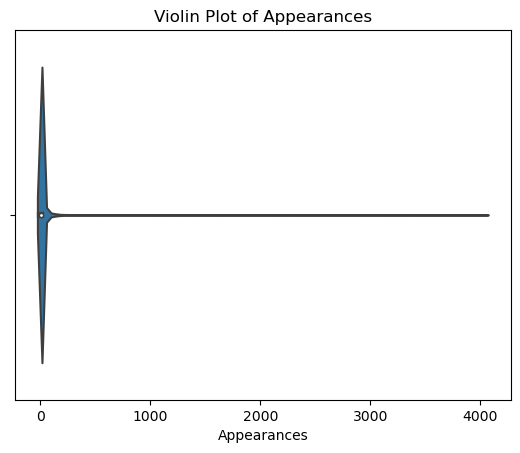

In [47]:
# sns.histplot(marvel_data['APPEARANCES'], kde=False, bins = 100)
# plt.title('Histogram of Values')
# plt.xlabel('APPEARANCES')
# plt.ylabel('Frequency')
# plt.show()

# sns.boxplot(marvel_data['APPEARANCES'])
# plt.show()

sns.violinplot(x=marvel_data['APPEARANCES'])
plt.title('Violin Plot of Appearances')
plt.xlabel('Appearances')
plt.show()

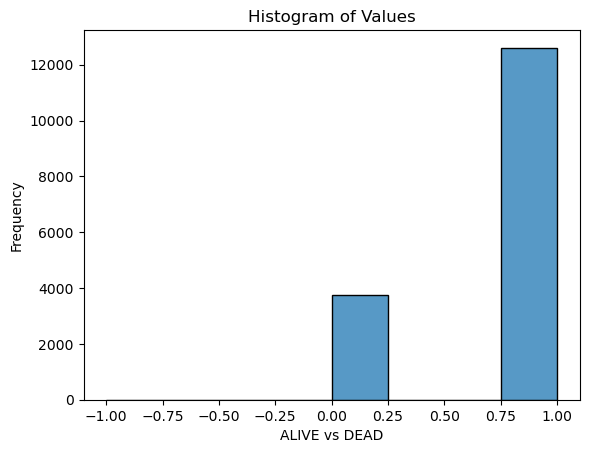

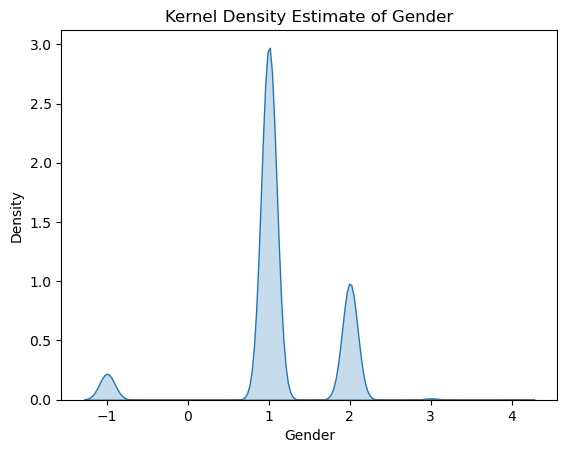

In [48]:

sns.histplot(marvel_data['ALIVE'], kde=False, bins = 8)
plt.title('Histogram of Values')
plt.xlabel('ALIVE vs DEAD')
plt.ylabel('Frequency')
plt.show()


    # KDE Plot
sns.kdeplot(marvel_data['SEX'], fill=True)
plt.title('Kernel Density Estimate of Gender')
plt.xlabel('Gender')
plt.ylabel('Density')
plt.show()


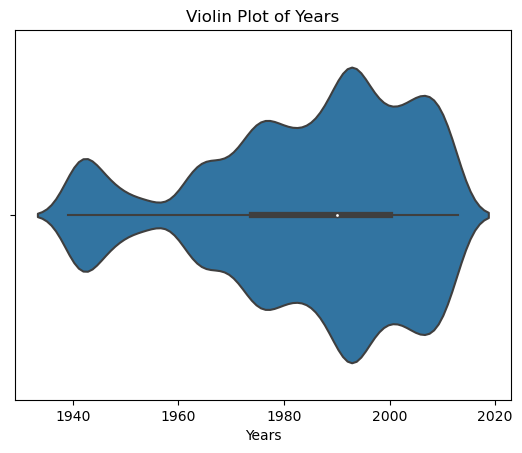

In [49]:
# violin plot
sns.violinplot(x=marvel_data['Year'])
plt.title('Violin Plot of Years')
plt.xlabel('Years')
plt.show()

Do you need to remove any outliers

## Correlations
Use heatmaps to find interesting correlations between data. Keep in mind that you can only use a heatmap on numerical data.

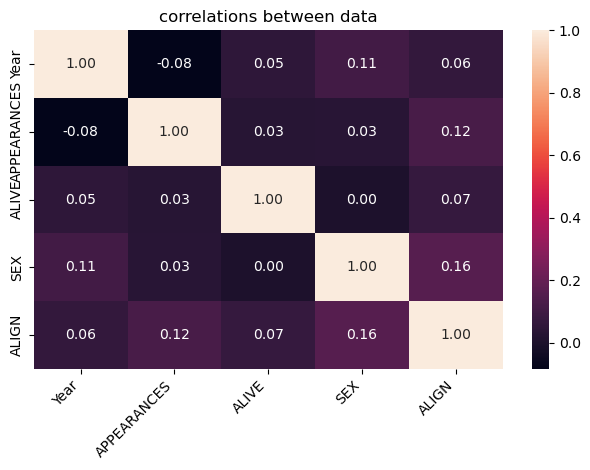

In [50]:
#  0.  name              16376 non-null  object 
#  1   ID                12606 non-null  object 
#  2   ALIGN             13564 non-null  object 
#  3   EYE               6609 non-null   object 
#  4   HAIR              12112 non-null  object 
#  5   SEX               15522 non-null  object 
#  6   GSM               90 non-null     object 
#  7   ALIVE             16373 non-null  object 
#  8   APPEARANCES       15280 non-null  float64
#  9   FIRST APPEARANCE  15561 non-null  object 
#  10  Year              15561 non-null  float64




list_of_interesting_data = ['Year', 'APPEARANCES', 'ALIVE','SEX', 'ALIGN']
corr = marvel_data[list_of_interesting_data].corr()

sns.heatmap(corr, annot=True, fmt=".2f")
plt.title('correlations between data')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Adjust the rotation angle here

plt.tight_layout()
plt.show()

## Relationships
Focus in on relationships. Create relplots, scatter plots, pairplots, and jointplots to showcase any relationships that you see within the data. Create a comprehensive exploration of the data.

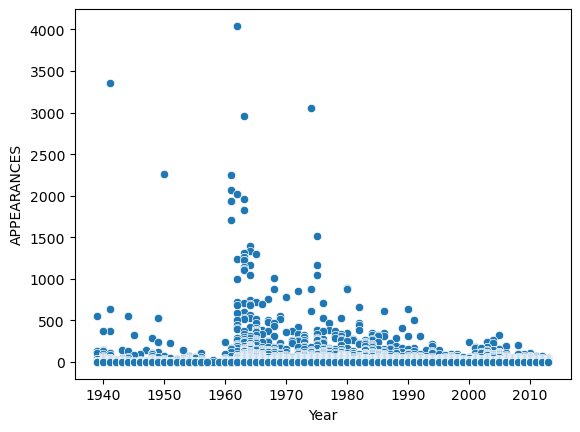

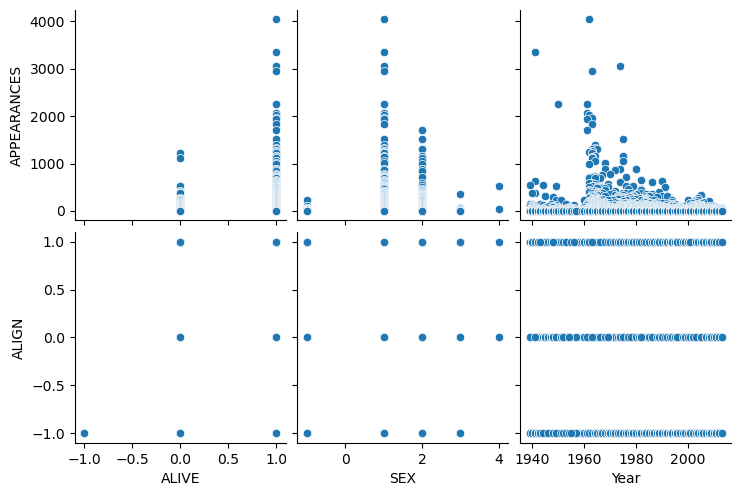

In [67]:
#Write code here

sns.scatterplot(data=marvel_data, x="Year", y="APPEARANCES")


sns.pairplot(
    marvel_data,
    x_vars=["ALIVE", "SEX", "Year"],
    y_vars=["APPEARANCES", "ALIGN"],
)


# sns.jointplot(data=marvel_data, x="", y="", kind="reg")

# sns.jointplot(data=marvel_data, x="", y="", kind="reg")



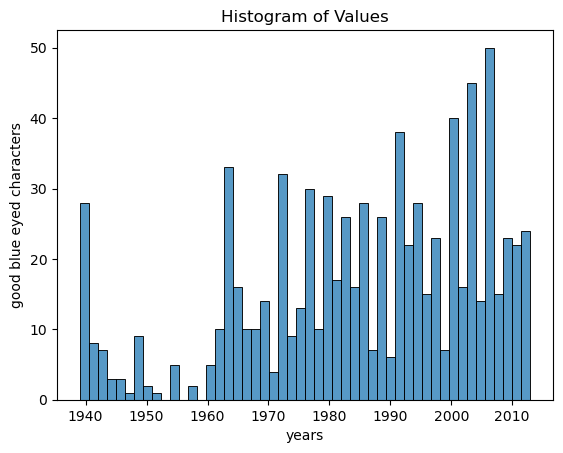

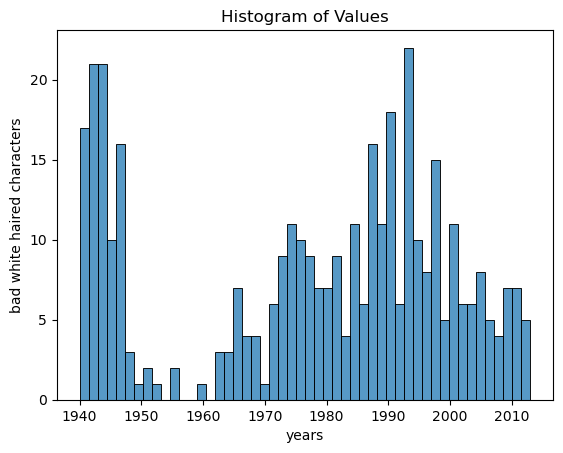

In [85]:
mask = (marvel_data['ALIGN'] == 1) & (marvel_data['EYE'] == 'Blue Eyes')
new_data = marvel_data[mask]

sns.histplot(new_data['Year'], kde=False, bins = 50)
plt.title('Histogram of Values')
plt.xlabel('years')
plt.ylabel('good blue eyed characters')
plt.show()


mask = (marvel_data['ALIGN'] == -1) & (marvel_data['HAIR'] == 'White Hair')
new_data = marvel_data[mask]

sns.histplot(new_data['Year'], kde=False, bins = 50)
plt.title('Histogram of Values')
plt.xlabel('years')
plt.ylabel('bad white haired characters')
plt.show()


# sns.barplot(marvel_data, x="EYE", y="?", hue="ALIGN")



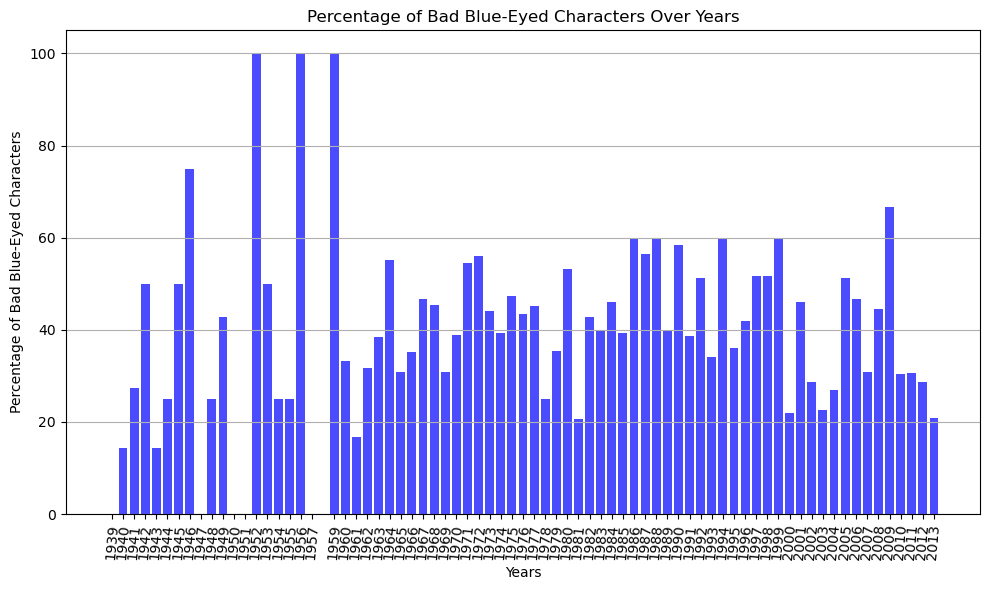

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming marvel_data is your DataFrame
mask_blue_eyes = marvel_data['EYE'] == 'Blue Eyes'
blue_eyes = marvel_data[mask_blue_eyes]

mask_bad_blue_eyes = (blue_eyes['ALIGN'] == -1)
bad_blue_eyes = blue_eyes[mask_bad_blue_eyes]

# Calculate the percentage of good blue-eyed characters for each year
percentages = bad_blue_eyes.groupby('Year').size() / blue_eyes.groupby('Year').size() * 100
percentages = percentages.fillna(0)  # Handle cases where there might be no characters with blue eyes in a year

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(percentages.index, percentages.values, align='center', alpha=0.7, color='blue')
plt.title('Percentage of Bad Blue-Eyed Characters Over Years')
plt.xlabel('Years')
plt.ylabel('Percentage of Bad Blue-Eyed Characters')
plt.xticks(percentages.index, rotation=85)  # Show all years on x-axis with rotation for better readability
plt.grid(axis='y')
plt.tight_layout()
plt.show()


For each group, write a short description of your findings.

## Conclusion
Based on everything, you explored write a summary of your findings. Include graphs to support your argument.